In [2]:
!pip install -U torch-snippets typer imgaug

^C


2021-08-19 13:14:21.751 | WARNING  | torch_snippets:<module>:9 - torch is not found. Skipping relevant imports from submodule `torch_loader`
Exception: No module named 'torch'
2021-08-19 13:14:23.674 | WARNING  | torch_snippets:<module>:14 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'
2021-08-19 13:14:23.680 | INFO     | __main__:<module>:3 - loaded 21 lines


name 'torch' is not defined


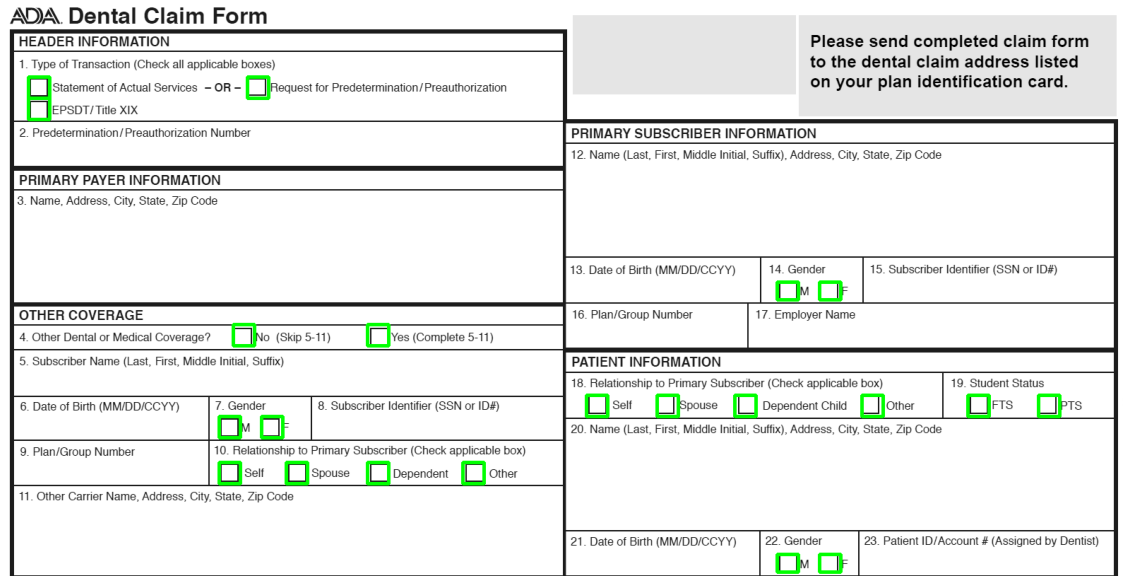

In [1]:
from torch_snippets import *
project = P('/Users/Takayi/Documents/1shotAI/dental-template')
lines = readlines(project/'annotations.txt')
lines = [l.split() for l in lines]
CLSS = [int(l) for l,*_ in lines]
BBS = [[int(pt) for pt in pts] for _,*pts in lines]

TEMPLATE = read(project/'template.png')

show(TEMPLATE, bbs=BBS)

In [2]:
from lib.generate import *

In [5]:
root = P('/Users/Takayi/Documents/1shotAI/dental-template')
unzip_file(root/'checkboxes.zip', 'root/check_boxes/')

In [4]:
import imgaug.augmenters as iaa
seq = iaa.Sequential([
    iaa.Crop(px=((0, 15),(0,15),(0,15),(0,15))), 
    iaa.GaussianBlur(sigma=(0, 0.5)), 
    iaa.Affine(
        translate_px=(-50, 50),
        scale=(0.95, 1.05),
        rotate=(-2,2),
        cval=(255,255),
        fit_output=False
    ),
    iaa.OneOf([iaa.pillike.FilterSharpen(),
    iaa.pillike.FilterBlur()]),
    
    iaa.Dropout((0.01, 0.03), per_channel=0.5),
    iaa.Multiply((0.8, 1.2)), # change brightness, doesn't affect BBs
])

In [6]:
records = generate_data(
    TEMPLATE, BBS, CLSS, 5, seq,
    checkbox_folder='root/check_boxes/'
)

2021-08-19 13:16:48.321 | INFO     | torch_snippets.paths:inner:24 - 1870 files found at root/check_boxes//YES/*
2021-08-19 13:16:48.386 | INFO     | torch_snippets.paths:inner:24 - 3715 files found at root/check_boxes//NO/*


name 'torch' is not defined


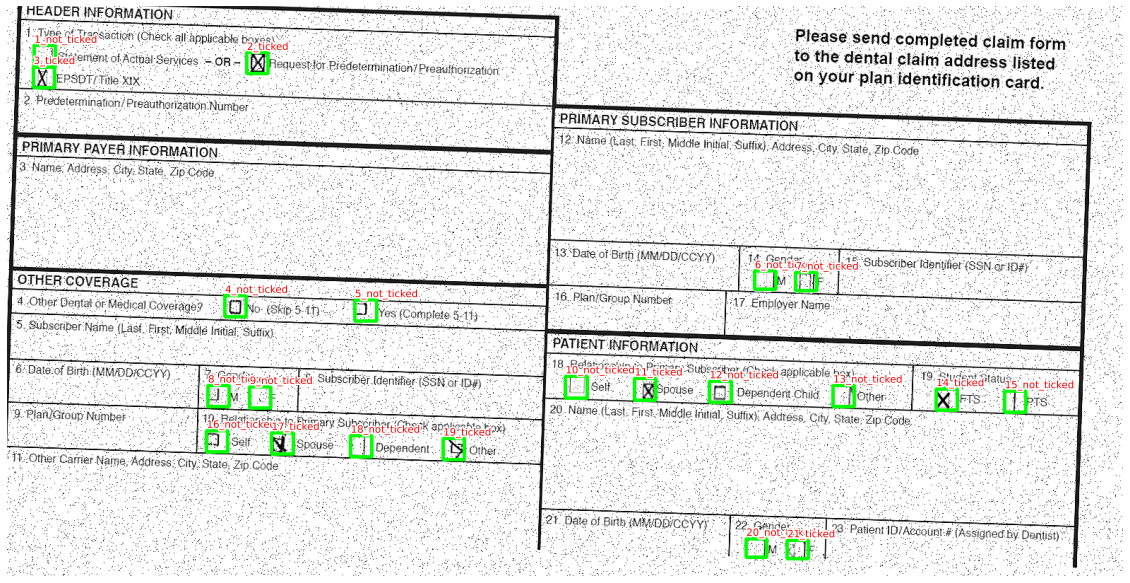

name 'torch' is not defined


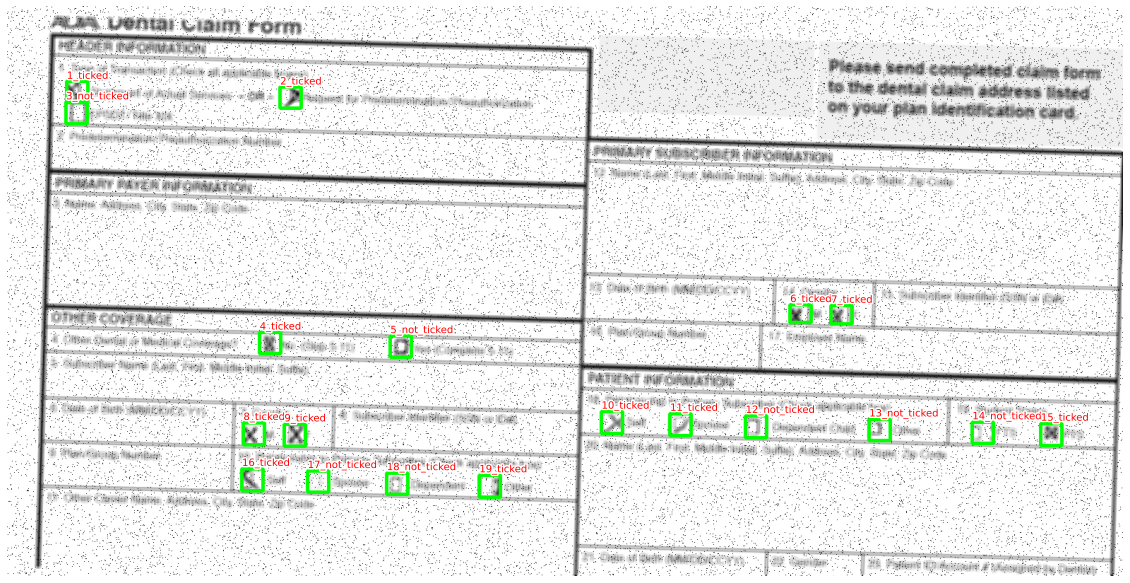

name 'torch' is not defined


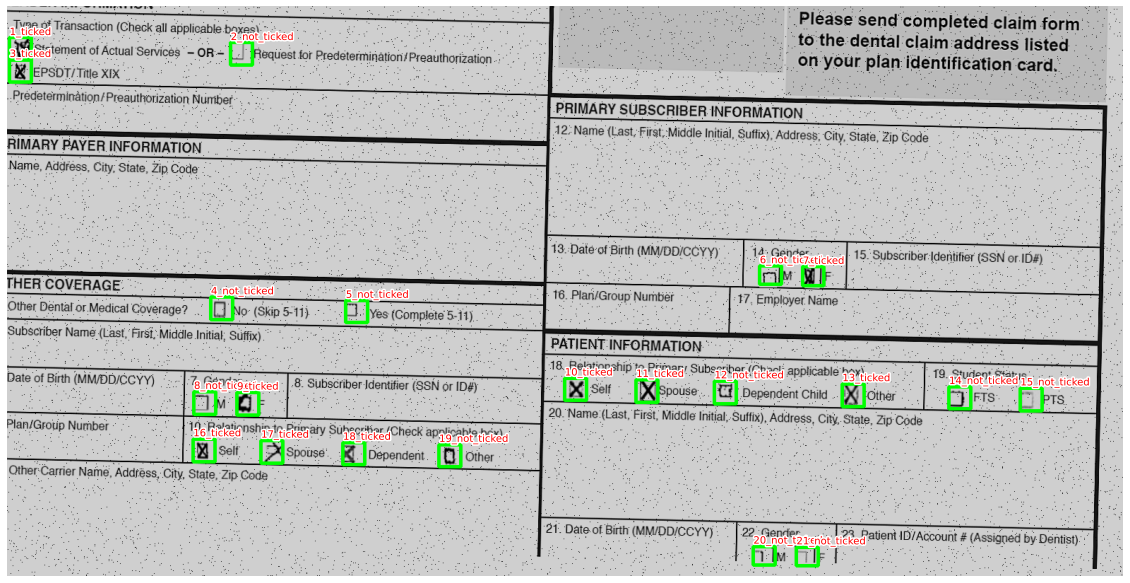

name 'torch' is not defined


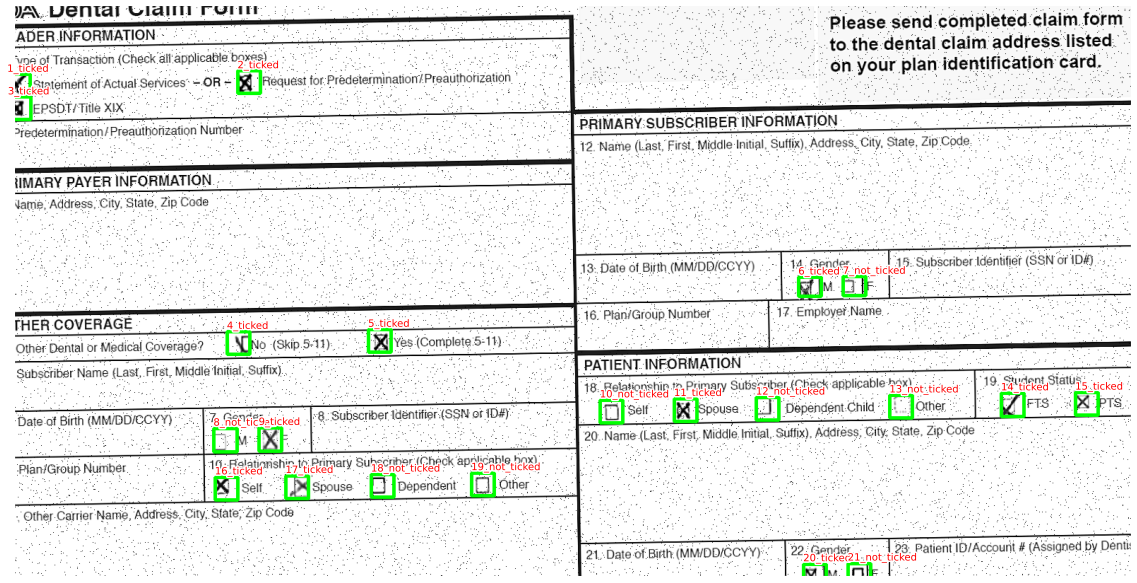

name 'torch' is not defined


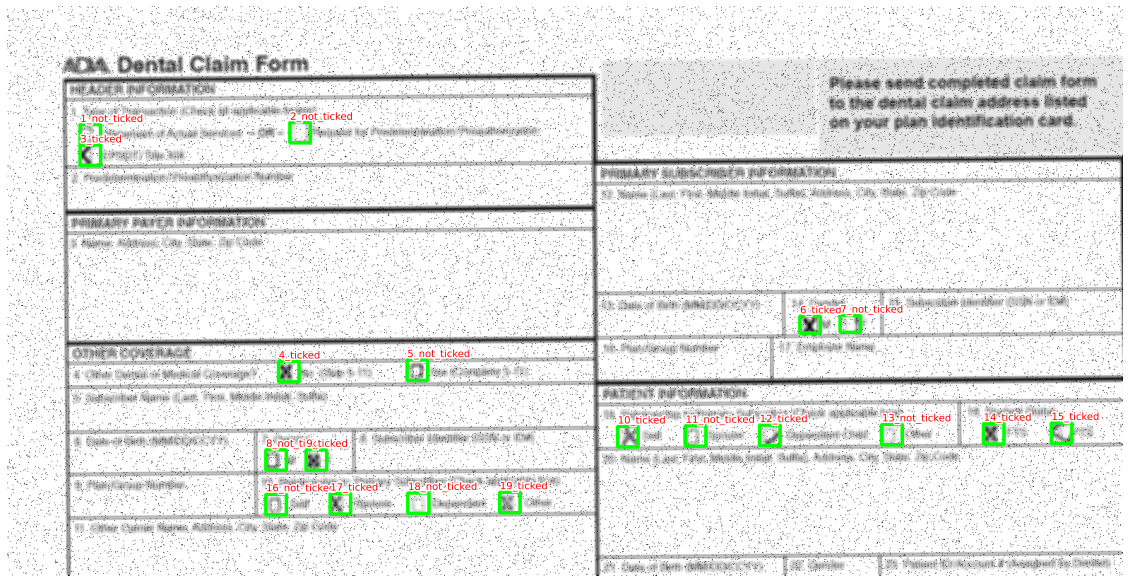

In [7]:
inspect_records(records)